# What is a GWAS?

Conor O’Hare  
Samuele Soraggi
[](https://orcid.org/0000-0002-1159-5535)  
Alba Refoyo Martinez
[](https://orcid.org/0000-0002-3674-4007)

> **Information about this notebooks**
>
> During the past two decades, there has been a growing interest in
> investigating the influence of genetic risk factors on variation in
> human behaviour. The technical and analytic tools needed to conduct
> genetic studies have become increasingly accessible. This increased
> accessibility offers great promise as researchers outside the field of
> genetics may bring new expertise to the field (e.g., more in‐depth
> knowledge of the nosology of psychiatric traits). However, performing
> genetic association studies in a correct manner requires specific
> knowledge of genetics, statistics, and (bio)informatics. This course
> aims to provide a guideline for conducting genetic analyses by
> introducing key concepts and by sharing scripts that can be used for
> data analysis. We start with a short introductory overview of GWAS in
> this notebook before delving into coding in the following notebooks.
> Here there is only text to read.
>
> ## Learning outcomes
>
> -   **recognize and discuss** the basic terminology of genetic theory
>     and GWAS basic principles
> -   **describe** known genetic variants databases
> -   **identify** the main steps of a typical GWAS analysis

## Quick Review of Genetic Theory

We all carry two nuclear genomes (i.e. genomes located in cell nucleus),
one inherited from each of our two parents. Additionally, we have a
small mitochondrial genome, [assumed to
be](http://www.pnas.org/content/early/2018/11/21/1810946115) inherited
exclusively from the mother, but on this course the term ‘genome’ refers
to the nuclear genome.

The human genome is a 3.2 billion **nucleotide** (or **base pair** or
**DNA letter** A,C,G,T) long sequence ([see
yourgenome.org](https://www.yourgenome.org/facts/what-is-dna)), that is
divided into separate physical pieces called **chromosomes** ([see
yourgenome.org](https://www.yourgenome.org/facts/what-is-a-chromosome)).
There are 22 **autosomal** (non-sex related) chromosomes and two **sex
chromosomes** (X chromosome and Y chromosome). Normally, humans have two
copies of each autosome and individuals with one copy of X and one of Y
are males whereas individuals who have two copies of X are females.
Abnormal number of chromosomes (called **aneuploidies**) typically cause
severe consequences or an early death if present in all cells of an
individual. The most common non-lethal exception is the Down syndrome (3
copies of chr 21). **Mosaicism**, where some cells have abnormal
chromosome numbers also exist and are often present in cancer cells.

There are three types of pairings that come up when we analyse genomes.

-   First, the DNA is most of the time a double-stranded molecule whose
    two strands (i.e. the two DNA molecules) are glued together by the
    chemical base pairings A-T and C-G. This base pairing is a key to
    the copying mechanism of the DNA that is needed before any cell
    division ([see
    yourgenome.org](https://www.yourgenome.org/video/dna-replication))
    and the DNA molecules that are connected through base pairing have
    the exact same information, just written in the reverse letters
    i.e. A \<-\> T and C \<-\> G. To make distinction between the two
    DNA molecules, it has been agreed that one of the two DNA strands is
    called the **forward strand** (or **positive strand**) and the other
    the **reverse strand** (or **negative strand**). Thus, e.g., when +
    strand contains base A, the corresponding base on - strand is T and
    vice versa.

-   Second, the two **homologous** choromosomes of an individual
    (e.g. paternal chr 13 with maternal chr 13, or in a male, maternal X
    and paternal Y) can be thought of as a pair. Thus, we say that the
    human genome consists of 22 autosomes + X + Y, but each individual
    has two copies of each homologous chromosome, so has 46 unique
    chromosomes that are divided into 23 pairs of homologous
    chromosomes.

-   Third, before any **cell division** each of the 46 unique
    chromosomes of an individual copies itself and the two copies
    (called sister chromatids) are paired with each other physically to
    make an X-like shape that is often used to show chromosomes in
    pictures. Such picture actually has 92 chromosomes since each unique
    chromosome is duplicated in it (but we typically say that there are
    46 replicated chromosomes rather than that there are 92
    chromosomes). This pairing after copying is important in cell
    division so that the resulting cells will get the correct set of
    choromosomes. In mitosis (ordinary cell division), each of the two
    new cells has one set of the 46 unique chromosomes. In meiosis, the
    gametes (sperm and eggs) are formed to have only one copy of each
    homologous chromosome and thus have 23 unique chromosomes. During
    meiosis, the process of **recombination** shuffles the homologous
    copies of the paternal and maternal chromosomes in such a way that
    each of the offspring’s chromosomes will be a mixture of its
    grandparental chromosome segments.

#### Other important terms

-   **Gene:** The most obvious way how genetic variation can affect
    phenotypes is through variation in how **genes** function. Genes are
    segements of DNA that code for proteins ([see
    yourgenome.org](https://www.yourgenome.org/video/from-dna-to-protein))
    and variation in the physical structure of the protein or in the
    time and place where the protein is made can have phenotypic
    consequences. Therefore, we are very interested in how genetic
    variation can affect the function of genes, and a lot of this is
    still unknown. Protein coding genes cover less than 2% of the whole
    human genome, but the remaining 98% affects the regulation of genes
    in many ways.

-   **Locus (pl. loci):** A continuous region of the genome is called a
    locus (plural loci). It can be of any size (e.g. a single nucleotide
    site of length 1 bp or a region of 10 milion base pairs, 10 Mbp).

-   **GWAS loci:** Regions that include a clear statistical association
    with the phenotype of interest.

### Genetic variants

At any one position of the genome (e.g. nucleotide site at position
13,475,383 of chromosome 1, denoted by chr1:13,475,383) variation can
exist between the genomes in the population. For example, my paternal
chromosome can have a base A and maternal chromosome can have a base G
(on the +strand of the DNA) at that position. Such a one-nucleotide
variation is called a **single-nucleotide variant (SNV)** and the two
versions are called **alleles**. So in the example case, I would be
carrying both an allele A and an allele G at that SNV, whereas you might
be carrying two copies of allele A at the same SNV. My **genotype**
would be AG and yours AA. An individual having different alleles on
his/her two genomes is **heterozygous** at that locus, and an individual
having two copies of the same allele is **homozygous** at that locus. If
neither of the alleles is very rare in the population, say, the **minor
allele frequency (MAF)** is \> 1% in the population, the variant is
called a polymorphism, **single-nucleotide polymorphism (SNP)**. There
are over 10 million SNPs in the human genome. More complex genetic
variation include structural variation (SV) such as copy number variants
(CNVs), that include duplications or deletions of genomic regions, or
rearrangements of the genome, such as inversions or translocations of
DNA segments ([see
yourgenome.org](https://www.yourgenome.org/facts/what-types-of-mutation-are-there)).

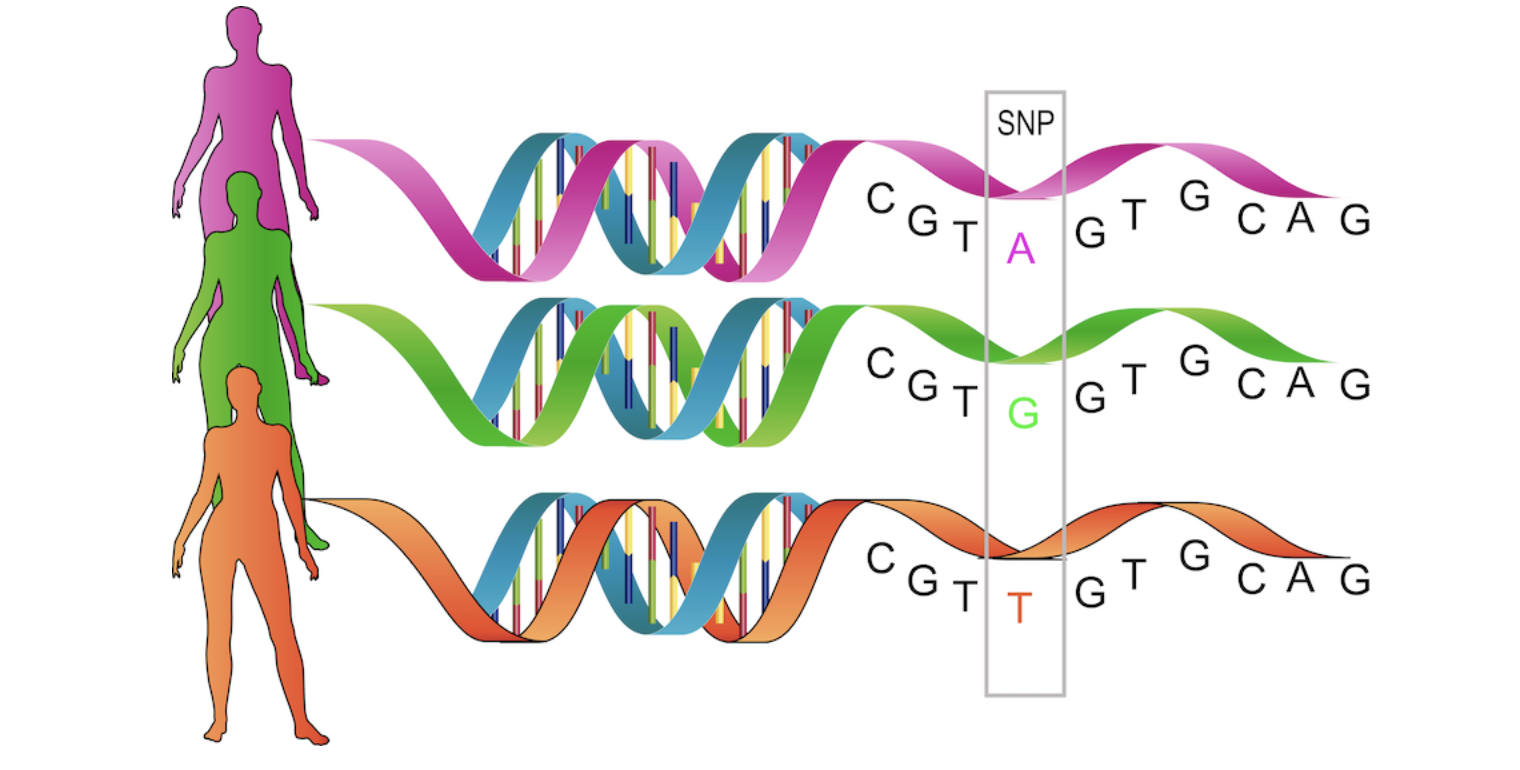
*Figure 1: SNPs are DNA differences at a specific location ([image
source](https://www.thetech.org/ask-a-geneticist/oca2-and-23andme))*

A predefined set of 500,000 - 1,000,000 SNPs can be measured reliably
and fairly cheaply (\< 50 euros/sample) by DNA microarrays, which has
been the single most important factor making GWAS possible. On this
course, we consider SNPs as the canonical type of genetic variation.
Typically, the SNPs are **biallelic**, i.e., there are only two alleles
present in the population and this is what we assume in the following.
In principle, however, all four possible alleles of a SNP could be
present in the population.

#### Ambiguous SNPs

If the two alleles of a SNP are either (C,G) or (A,T) we call the SNP
*ambiguous* because the strand information must be available (and
correct) in order to make sense of the genotypes at this SNP. This is
because allele C on + strand would be called allele G on - strand and if
this SNP is reported with respect to different strands in different
studies, the results get mixed up. The same problem does not happen with
the other SNPs, e.g., a SNP with alleles A,C, because this SNP contains
alleles T,G on the opposite strand and we could unambiguously match A to
T and C to G between the studies. Note that we can resolve most
ambiguous SNPs reliably based on the allele frequencies as long as the
minor allele frequency is not close to 50%. If we are combining several
studies, we should always start by plotting the allele frequencies
between the studies after the alleles should be matching each other in
order to see that the frequencies indeed match across the studies.

### Some catalogues of genetic variation

A large part of the genetics research over the last 30 years have been
driven by international projects aiming to catalogue genetic variation
in public domain.

| Database                                                                                             | Year      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|------------|---|----------------------------------------------------------|
| [The Human Genome Project](https://www.yourgenome.org/stories/what-was-the-human-genome-project-for) | 1990-2003 | Established a first draft of a human genome sequence. Collins and Fink (1995).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| [The HapMap project](https://www.genome.gov/10001688/international-hapmap-project/)                  | 2002-2009 | Studied the correlation structure of the common SNPs. Gibbs et al. (2003).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| [The 1000 Genomes project](http://www.internationalgenome.org/about)                                 | 2008-2015 | Expanded HapMap to genome sequence information across the globe and currently remains a widely-used reference for global allele frequency information. 1000G project was able to characterize well common variation in different *populations*, but missed many rare variants of single individuals because the costs of very accurate sequencing were too high. The tremendous impact of the 1000G project stems from the fact that everyone can download the individual level genome data of the 1000G samples from the project’s website and use it in their own research. Auton et al. (2015). |
| [Exome Aggregation Consortium (ExAC)](http://exac.broadinstitute.org/)                               | 2014-2016 | Concentrated only on the protein coding parts of the genome, so called *exons*, that make up less than 2% of the genome and was able to provide accurate sequence data for the exomes of over 60,000 individuals. This effort has been particularly important for medical interpretation of rare variants seen in clinics that diagnose patients with severe disease. ExAC provides summary level information through browser and downloads but individual level data cannot be downloaded. Lek et al. (2016).                                                                                     |
| [Genome Aggregation Database (gnomAD)](http://gnomad.broadinstitute.org/)                            | 2016-2020 | Is expanding the ExAC database and also includes additional whole genome sequencing information. It is the current state-of-the-art among the public genome variation databases. Chen et al. (2024).                                                                                                                                                                                                                                                                                                                                                                                               |

## What is a genome-wide association study?

Let’s look at some recent examples of GWAS. Two main types of GWAS are
studying quantitative traits or disease phenotypes.

#### Example 1 QT-GWAS

GWAS on body-mass index (BMI) (Locke et al. (2015)) combined data of
339,000 individuals from 125 studies around the world to study the
association of SNPs and BMI. It highlighted 97 regions of the genome
with convincing statistical association with BMI. Pathway analyses
provided support for a role of the central nervous system in obesity
susceptibility and implicated new genes and pathways related to synaptic
function, glutamate signalling, insulin secretion/action, energy
metabolism, lipid biology and adipogenesis.

<figure>
<img
src="attachment:GWAS1-WhatIsAGWAS_files/figure-ipynb/664233f6-1-BMI.png"
alt="A Manhattan plot that shows the –log10 P-value of each SNP tested in GWAS in the BMI study (Locke et al. (2015)). Manhattan plots will be explained later in the course, though for now, the idea that that after establishing a genome-wide significance level at P=5e-8 (which is equivalent to –log10(P) = 7.3), we can determine what variants are associated with the studied phenotype. Here, previously known loci are in blue, new findings are in red, and each locus in named by a nearby gene (but that gene is not necessarily causal.)" />
<figcaption aria-hidden="true">A Manhattan plot that shows the –log10
P-value of each SNP tested in GWAS in the BMI study (<span
class="citation" data-cites="locke_genetic_2015">Locke et al.
(2015)</span>). Manhattan plots will be explained later in the course,
though for now, the idea that that after establishing a genome-wide
significance level at P=5e-8 (which is equivalent to –log10(P) = 7.3),
we can determine what variants are associated with the studied
phenotype. Here, previously known loci are in blue, new findings are in
red, and each locus in named by a nearby gene (but that gene is not
necessarily causal.)</figcaption>
</figure>

#### Example 2 Disease GWAS

GWAS on migraine (Gormley et al. (2016)) combined genetic data on 60,000
cases (individuals with migraine) and 315,000 controls (individuals with
no known migraine) originating from 22 studies. Genetic data was
available on millions of genetic variants. At each variant, the genotype
distribution between cases and controls were compared. 38 regions of the
genome showed a convincing statistical association with migraine.
Downstream analyses combined the genes into pathways and cell types and
highlighted enrichment of signals near genes that are active in vascular
system.

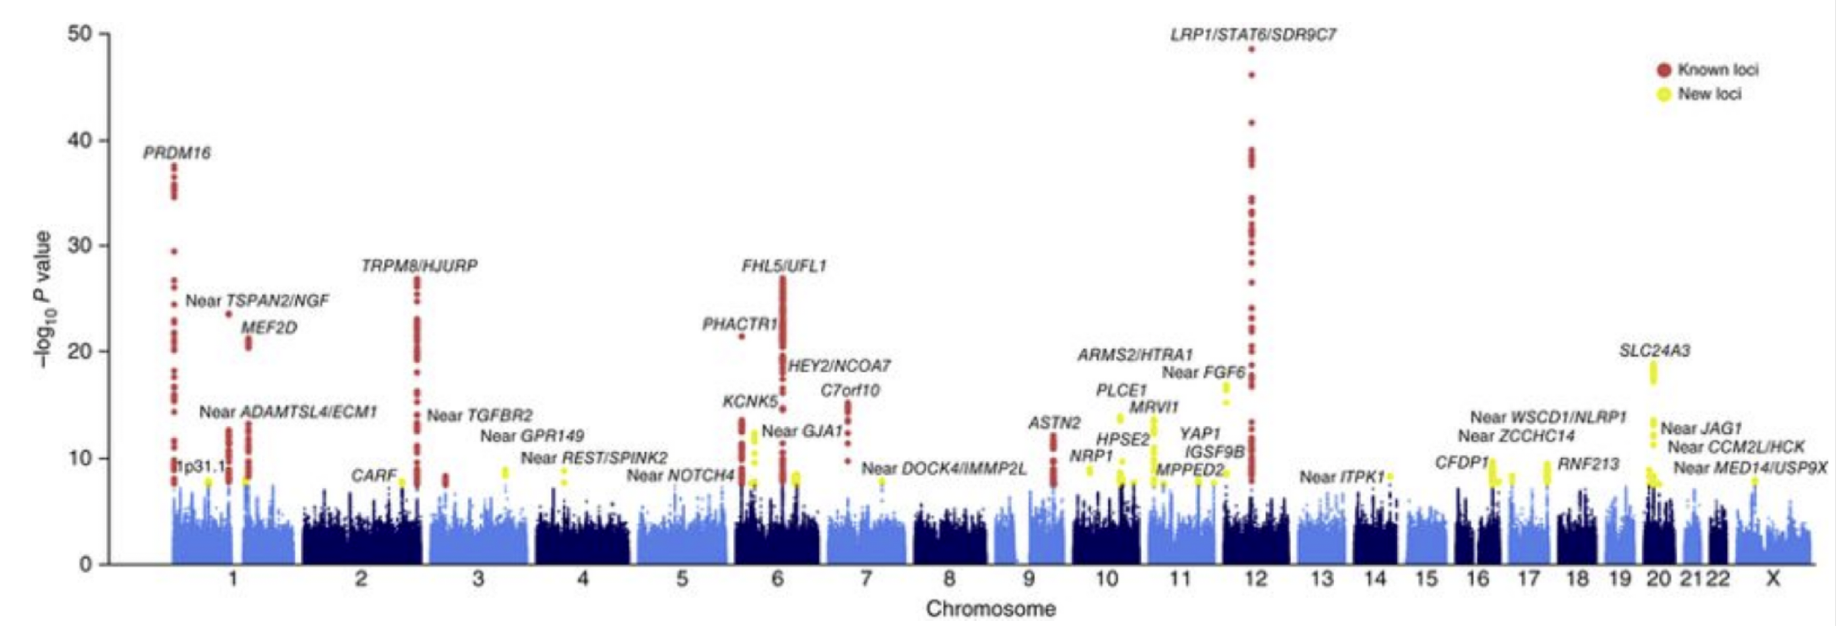

*Figure 3: GWAS study on migraines (Gormley et al. 2016)*

#### Important GWAS Terms:

-   **Monogenic** phenotype is determined by a single gene/locus.
-   **Oligogenic** phenotype is influenced by a handful of genes/loci.
-   **Polygenic** phenotype is influenced by many genes/loci.
-   **Complex trait** is a (quantitative) phenotype that is not
    monogenic. Typically polygenic and also influenced by many
    environmental factors.
-   **Common disease** is a disease/condition that is common in the
    population (say, prevalence of 0.1% or more). Examples: MS-disease
    (prevalence in the order of 0.1%), schizophrenia ($\sim 1\%$) or
    Type 2 diabetes ($\sim 10\%$).
-   **Common variant** has frequency of at least 1% (also 5% is used as
    the threshold).
-   **Low-frequency variant** has frequency of at least 0.1% and lower
    than a common variant.
-   **Rare variant** has frequency lower than a low-frequency variant.

GWAS have shown us that, very generally, complex traits and common
diseases are highly polygenic, and many common variants with only small
effects influence these phenotypes. We don’t yet know which are the
exact causal variants for each phenotype because of the correlation
structure among genetic variants. We also don’t yet know very accurately
how rare variants affect each phenotype because that requires very large
sample sizes interrogated by *genome sequencing* techniques, not only by
SNP arrays.

## Overview of GWAS Steps

The aim of genome‐wide association studies (GWAS) is to identify single
nucleotide polymorphisms (SNPs) of which the allele frequencies vary
systematically as a function of phenotypic trait values (e.g., between
cases with schizophrenia and healthy controls, or between individuals
with high vs. low scores on neuroticism). Identification of
trait‐associated SNPs may subsequently reveal new insights into the
biological mechanisms underlying these phenotypes. Technological
advancements allow investigation of the impact of large numbers of SNPs
distributed throughout the genome. Before we outline the procedure, we
will offer a reminder on some key biological concepts. The typical steps
of a GWAS are given below:

<figure>
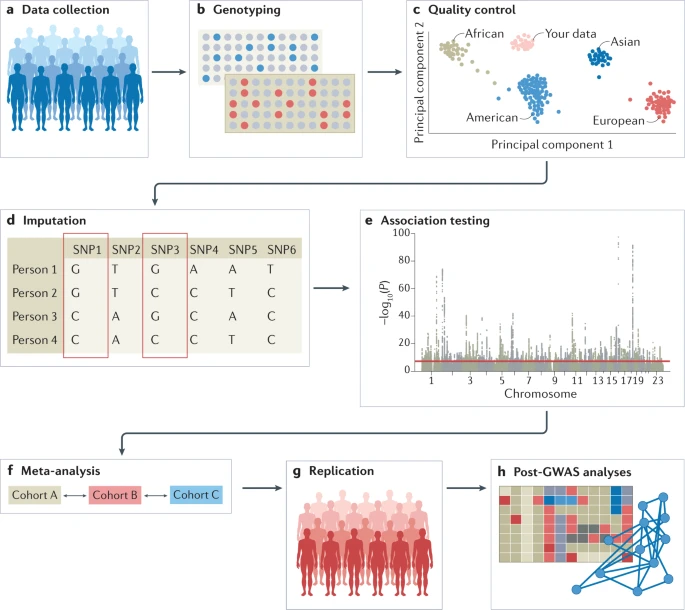
<figcaption aria-hidden="true">Overview of GWAS Steps (<span
class="citation" data-cites="uffelmann_genome-wide_2021">Uffelmann et
al. (2021)</span>)</figcaption>
</figure>

### a) Data Collection

Data can be collected from study cohorts or available genetic and
phenotypic information can be used from biobanks or repositories.
Confounders need to be carefully considered and recruitment strategies
must not introduce biases such as collider bias.

### b) Genotyping

Genotypic data can be collected using microarrays to capture common
variants, or next-generation sequencing methods for whole-genome
sequencing (WGS) or whole-exome sequencing (WES). The data is saved in
specific file formats that can be used for downstream analyses.

### c) Quality control

Quality control includes steps at the wet-laboratory stage, such as
genotype calling and DNA switches, and dry-laboratory stages on called
genotypes, such as deletion of bad single-nucleotide polymorphisms
(SNPs) and individuals, detection of population strata in the sample and
calculation of principle components. Figure depicts clustering of
individuals according to genetic substrata.

### d) Imputation

Genotypic data can be phased, and untyped genotypes imputed using
information from matched reference populations from repositories such as
1000 Genomes Project or TopMed. In the example given in the above
figure, genotypes of SNP1 and SNP3 are imputed based on the directly
assayed genotypes of other SNPs.

### e) Association testing

Genetic association tests are run for each genetic variant, using an
appropriate model (for example, additive, non-additive, linear or
logistic regression). Confounders are corrected for, including
population strata, and multiple testing needs to be controlled. Output
is inspected for unusual patterns and summary statistics are generated.

### f) Meta-analysis

To increase sample size, GWAS is typically carried out in the context of
a consortium such as the Psychiatric Genomics Consortium, the Genetic
Investigation of Anthropometric Traits (GIANT) consortium or the Global
Lipids Genetics Consortium where data from multiple cohorts are analysed
together using tools such as METAL.

### g) Replication

Results can be replicated using internal replication or external
replication in an independent cohort. For external replication, the
independent cohort must be ancestrally matched and not share individuals
or family members with the discovery cohort.

### h) Post-GWAS analyses

In silico analysis of genome-wide association studies (GWAS), using
information from external resources. This can include in silico
fine-mapping, SNP to gene mapping, gene to function mapping, pathway
analysis, genetic correlation analysis, Mendelian randomization and
polygenic risk prediction. After GWAS, functional hypotheses can be
tested using experimental techniques such as CRISPR or massively
parallel reporter assays, or results can be validated in a human
trait/disease model (not shown)

------------------------------------------------------------------------

# Wrapping up

This course will cover, from the above steps, introduction to data
collection and genotyping, quality control (which will look at factors
such as relatedness, population structure and summary statistics), and
association testing.

As current GWAS consider 10,000s of individuals and millions of
variants, those analyses are done with a specific software that read the
specific file formats. The most popular software is PLINK, which we will
use in the following notebooks. We will also look at a more advanced
tool called LDAK in the advanced section of the course.

# Bibliography

Auton, Adam, Gonçalo R. Abecasis, David M. Altshuler, Richard M. Durbin,
Gonçalo R. Abecasis, David R. Bentley, Aravinda Chakravarti, et al.
2015. “A Global Reference for Human Genetic Variation.” *Nature* 526
(7571): 68–74. <https://doi.org/10.1038/nature15393>.

Chen, Siwei, Laurent C. Francioli, Julia K. Goodrich, Ryan L. Collins,
Masahiro Kanai, Qingbo Wang, Jessica Alföldi, et al. 2024. “A Genomic
Mutational Constraint Map Using Variation in 76,156 Human Genomes.”
*Nature* 625 (7993): 92–100.
<https://doi.org/10.1038/s41586-023-06045-0>.

Collins, Francis S., and Leslie Fink. 1995. “The Human Genome Project.”
*Alcohol Health and Research World* 19 (3): 190–95.
<https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6875757/>.

Gibbs, Richard A., John W. Belmont, Paul Hardenbol, Thomas D. Willis,
Fuli Yu, Huanming Yang, Lan-Yang Ch’ang, et al. 2003. “The International
HapMap Project.” *Nature* 426 (6968): 789–96.
<https://doi.org/10.1038/nature02168>.

Gormley, Padhraig, Verneri Anttila, Bendik S. Winsvold, Priit Palta,
Tonu Esko, Tune H. Pers, Kai-How Farh, et al. 2016. “Meta-Analysis of
375,000 Individuals Identifies 38 Susceptibility Loci for Migraine.”
*Nature Genetics* 48 (8): 856–66. <https://doi.org/10.1038/ng.3598>.

Lek, Monkol, Konrad J. Karczewski, Eric V. Minikel, Kaitlin E. Samocha,
Eric Banks, Timothy Fennell, Anne H. O’Donnell-Luria, et al. 2016.
“Analysis of Protein-Coding Genetic Variation in 60,706 Humans.”
*Nature* 536 (7616): 285–91. <https://doi.org/10.1038/nature19057>.

Locke, Adam E., Bratati Kahali, Sonja I. Berndt, Anne E. Justice, Tune
H. Pers, Felix R. Day, Corey Powell, et al. 2015. “Genetic Studies of
Body Mass Index Yield New Insights for Obesity Biology.” *Nature* 518
(7538): 197–206. <https://doi.org/10.1038/nature14177>.

Uffelmann, Emil, Qin Qin Huang, Nchangwi Syntia Munung, Jantina de
Vries, Yukinori Okada, Alicia R. Martin, Hilary C. Martin, Tuuli
Lappalainen, and Danielle Posthuma. 2021. “Genome-Wide Association
Studies.” *Nature Reviews Methods Primers* 1 (1): 1–21.
<https://doi.org/10.1038/s43586-021-00056-9>.
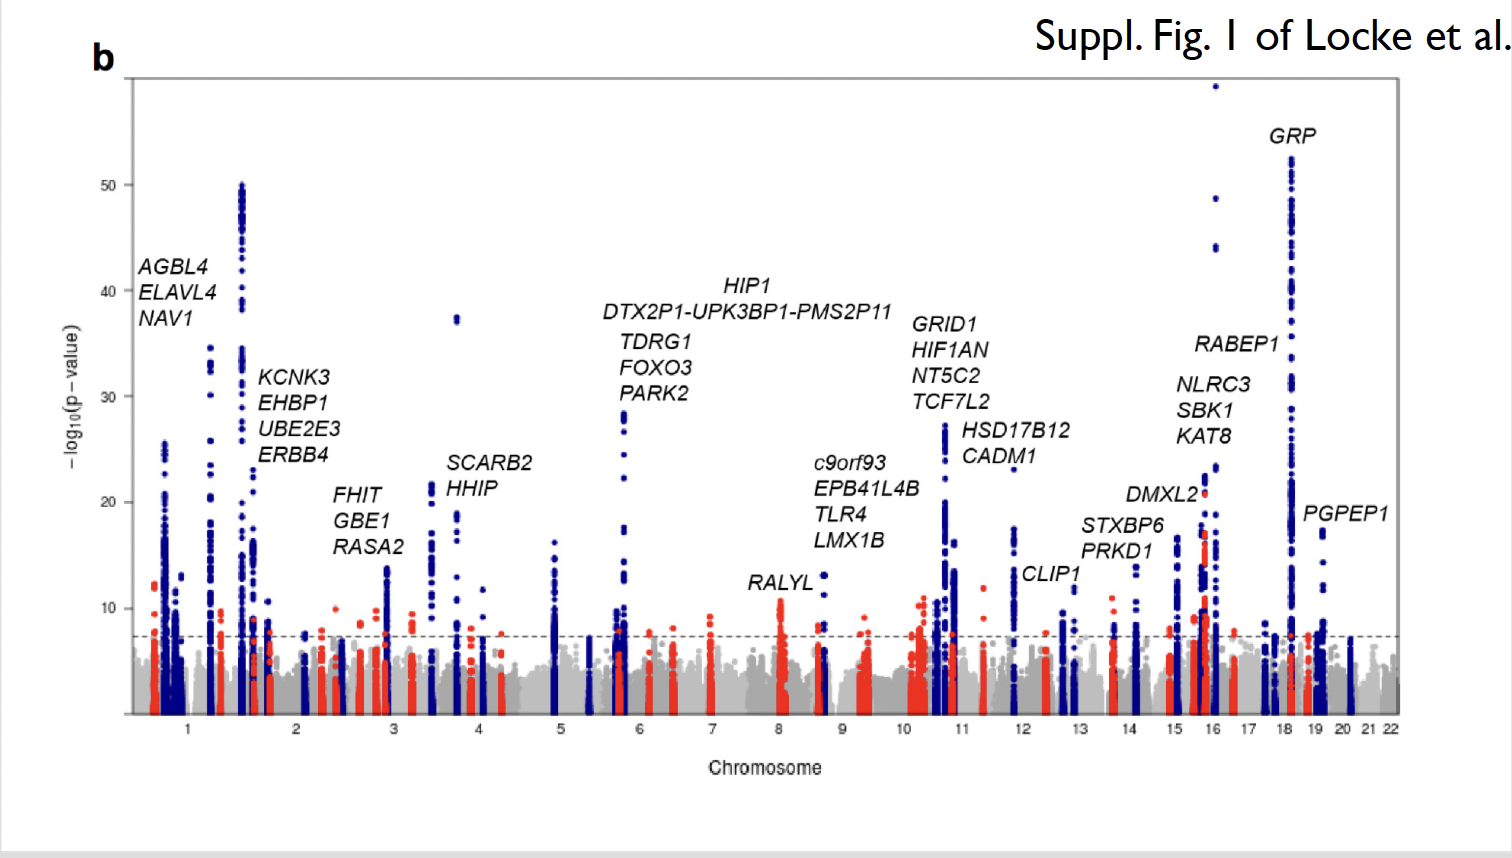